# Julia Code
from https://juliadynamics.github.io/DynamicalSystems.jl/latest/chaos/lyapunovs/#maximum-lyapunov-exponent

In [1]:
using Pkg; Pkg.update("DynamicalSystems")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
using Pkg;
Pkg.update()

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Installed MbedTLS_jll ────────── v2.16.8+1
  Installed LaTeXStrings ───────── v1.2.1
  Installed Formatting ─────────── v0.4.2
  Installed FFMPEG ─────────────── v0.4.0
  Installed FillArrays ─────────── v0.8.14
  Installed IJulia ─────────────── v1.23.2
  Installed ForwardDiff ────────── v0.10.18
  Installed Plots ──────────────── v1.6.12
  Installed PlotThemes ─────────── v2.0.1
  Installed RecipesPipeline ────── v0.1.13
  Installed CommonSubexpressions ─ v0.3.0
  Installed Latexify ───────────── v0.14.12
  Installed GeometryBasics ─────── v0.3.12
  Installed Distributions ──────── v0.23.8
  Installed StructArrays ───────── v0.5.1
  Installed ArrayInterface ─────── v3.1.1
  Installed GR ─────────────────── v0.52.0
  Installed ColorSchemes ───────── v3.12.1
  Installed PlotUtils ──────────── v1.0.10
  Installed RecipesBase ────────── v1.1.1
  Installed MbedTLS ────────────── v1.0.3
  Installed EarCut_jll ─────────── v2.1.5+1
##########################################################

In [1]:
using Plots

In [2]:
using DynamicalSystems

In [3]:
henon = Systems.henon()
tr1 = trajectory(henon, 100)
summary(tr1)

"2-dimensional Dataset{Float64} with 101 points"

In [4]:
u2 = get_state(henon) + (1e-9 * ones(2))
tr2 = trajectory(henon, 100, u2)
summary(tr2)

"2-dimensional Dataset{Float64} with 101 points"

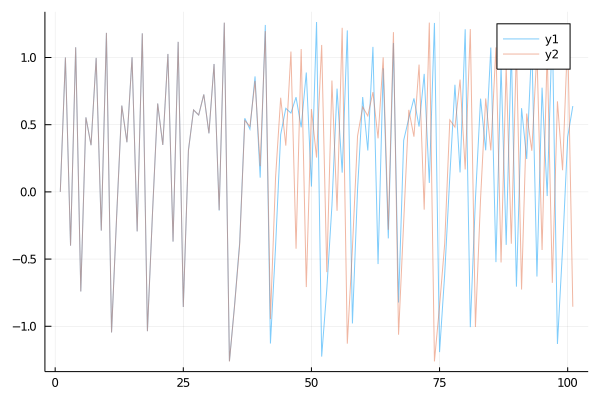

In [5]:
using LinearAlgebra: norm

# Plot the x-coordinate of the two trajectories:
#ax1 = subplot(2,1,1)
plot([tr1[:, 1],tr2[:, 1]], alpha = 0.5)
#plot(tr2[:, 1], alpha = 0.5)
#ylabel("x")


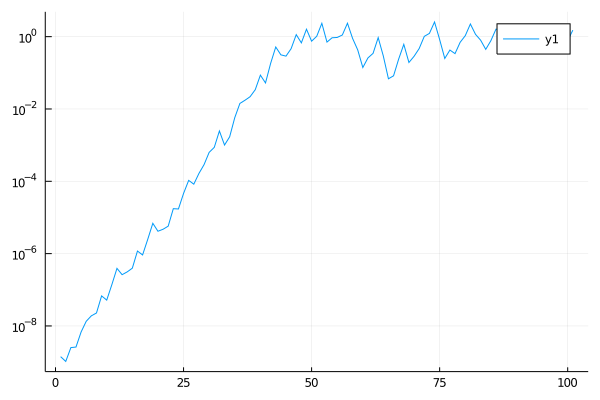

In [6]:
# Plot their distance in a semilog plot:
#ax2 = subplot(2,1,2, sharex = ax1)
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
#ylabel("d"); xlabel("n"); 
#semilogy(d);
plot(d, yaxis=:log) 

The initial slope of the d vs n plot (before the curve saturates) is approximately the maximum Lyapunov exponent

# EX 2

In [7]:
using DynamicalSystems
ds = Systems.towel()
λλ = lyapunov(ds, 10000)

0.4325272992490464

In [8]:
lor = Systems.lorenz(ρ = 32.0) #this is not the original parameter!
λλ = lyapunov(lor, 10000, dt = 0.1)

0.9920253706553216

In [9]:
lor

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 32.0, 2.6666666666666665]

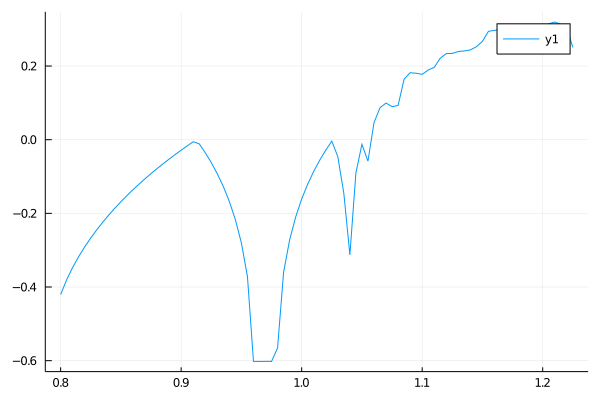

In [10]:
he = Systems.henon()
as = 0.8:0.005:1.225; λs = zeros(length(as))
for (i, a) in enumerate(as)
    set_parameter!(he, 1, a)
    λs[i] = lyapunov(he, 10000; Ttr = 500)
end

plot(as, λs)

# Defining new dynamical systems

In [11]:
#using DynamicalSystems # also exports relevant StaticArrays names
# Lorenz system
# Equations of motion:
@inline @inbounds function lorenz(u, p, t)
    σ = p[1]; ρ = p[2]; β = p[3]
    du1 = σ*(u[2]-u[1])
    du2 = u[1]*(ρ-u[3]) - u[2]
    du3 = u[1]*u[2] - β*u[3]
    return SVector{3}(du1, du2, du3)
end
# Jacobian:
@inline @inbounds function lorenz_jac(u, p, t)
    σ, ρ, β = p
    J = @SMatrix [-σ  σ  0;
    ρ - u[3]  (-1)  (-u[1]);
    u[2]   u[1]  -β]
    return J
end

ds = ContinuousDynamicalSystem(lorenz, [0.0, 10.0, 0.0], [10.0, 32.0, 8/3], lorenz_jac)

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      lorenz
 in-place?    false
 jacobian:    lorenz_jac
 parameters:  [10.0, 32.0, 2.6666666666666665]

In [12]:
lyapunov(ds, 10000, dt = 0.1)

0.9920253706553216

# Predator Prey
with kicks

In [69]:
@inline @inbounds function predprey_det(u, p, t)
    m = p[1]; k = p[2]; c=p[3];
    du1 = u[1]*(1-u[1]/k)-m*u[2]*u[1]/(1+u[1])
    du2 = -c*u[2]+m*u[1]*u[2]/(1+u[1])
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function predprey_jac_det(u, p, t)
    m,k,c= p
    J = @SMatrix [(1-2*u[1]/k +m*u[1]*u[2]/(1+u[1])^2 - m*u[2]/(1+u[1])) -m*u[1]/(1+u[1]);
        (-m*u[1]*u[2]/(1+u[1])^2 + m*u[2]/(1+u[1])) (-c+m*u[1]/(1+u[1]))]
  
    return J
end

predprey_jac_det (generic function with 1 method)

In [70]:
pred_prey_det = ContinuousDynamicalSystem(predprey_det, [.001,.5], [0.25,12,0.6], predprey_jac_det)
lyapunov(pred_prey_det, 10000, dt = .1)

-0.0005511242220866164

In [104]:
@inline @inbounds function predprey(u, p, t)
    m = p[1]; k = p[2]; c=p[3];Tdist = p[4]; Adist=p[5]
    du1 = u[1]*(1-u[1]/k)-m*u[2]*u[1]/(1+u[1])
    du2 = -c*u[2]+m*u[1]*u[2]/(1+u[1])
    A = Distributions.rand(Adist)
    T = Distributions.rand(Tdist)
    if t%T<.001
        #print(t, " ", T, "\n")
        du1 = du1-A*u[1]
    end
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function predprey_jac(u, p, t)
    m,k,c,Tdist,Adist= p
    A=Distributions.rand(Adist)
    T = Distributions.rand(Tdist)
    if t%T<.001
        J = @SMatrix [(1-2*u[1]/k +m*u[1]*u[2]/(1+u[1])^2 - m*u[2]/(1+u[1])-A) -m*u[1]/(1+u[1]);
        (-m*u[1]*u[2]/(1+u[1])^2 + m*u[2]/(1+u[1])) (-c+m*u[1]/(1+u[1]))]
    else
        J = @SMatrix [(1-2*u[1]/k +m*u[1]*u[2]/(1+u[1])^2 - m*u[2]/(1+u[1])) -m*u[1]/(1+u[1]);
        (-m*u[1]*u[2]/(1+u[1])^2 + m*u[2]/(1+u[1])) (-c+m*u[1]/(1+u[1]))]
    end
    return J
end


predprey_jac (generic function with 1 method)

In [105]:
pred_prey = ContinuousDynamicalSystem(predprey, [.001,.5], [0.25,12,0.6,Distributions.Exponential(4),Distributions.Uniform(0.8, 1.0)], predprey_jac)
lyapunov(pred_prey, 10000, dt = .1)

0.13255388109124713

In [106]:
pred_prey = ContinuousDynamicalSystem(predprey, [.001,.5], [0.25,12,0.6,Distributions.Exponential(20),Distributions.Uniform(0.8, 1.0)], predprey_jac)
lyapunov(pred_prey, 10000, dt = .1)

0.019503907074561153

In [107]:
Ts = 1:1:20; λs = zeros(length(Ts))
for (i, T) in enumerate(Ts)
    pred_prey = ContinuousDynamicalSystem(predprey, [.001,.5], [0.25,12,0.6,Distributions.Exponential(T),Distributions.Uniform(0.8, 1.0)], predprey_jac)
    λs[i] = lyapunov(pred_prey, 10000, dt = .1)
end

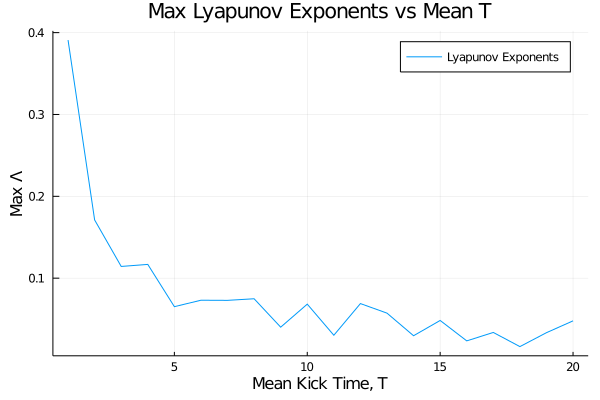

In [108]:
plot(Ts, λs, title = "Max Lyapunov Exponents vs Mean T", label="Lyapunov Exponents")
xlabel!("Mean Kick Time, T")
ylabel!("Max Λ")

# Lin Model

In [131]:
@inline @inbounds function lin_model(u, p, t)
    σ = p[1]; λ = p[2]; Adist = p[3]; Tdist=p[4]
    du1 = 1+σ*u[2]
    du2 = -λ*u[2]
    A = Distributions.rand(Adist)
    T = Distributions.rand(Tdist)
    if t%T<.01
        du2 = du2+A*sin(2*π*u[1])
        print(t)
        print("\n")
    end
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function lin_model_jac(u, p, t)
    σ,λ,Adist,Tdist=p
    A=Distributions.rand(Adist)
    T = Distributions.rand(Tdist)
    if t%T<.01
        J = @SMatrix [0 σ;
        2*π*A*cos(2*π*u[1])   -λ]
    else
        J = @SMatrix [0 σ;
        0   -λ]
    end
    return J
end

dsl_mod = ContinuousDynamicalSystem(lin_model, [.01, .01], [3.0,0.1,Distributions.Exponential(20),Distributions.Uniform(0.8, 1.0)], lin_model_jac)

0.0


2-dimensional continuous dynamical system
 state:       [0.01, 0.01]
 e.o.m.:      lin_model
 in-place?    false
 jacobian:    lin_model_jac
 parameters:  Any[3.0, 0.1, Exponential{Float64}(θ=20.0), Uniform{Float64}(a=0.8, b=1.0)]

In [132]:
Ts = 1:1:20; λs = zeros(length(Ts))
for (i, T) in enumerate(Ts)
    dsl = ContinuousDynamicalSystem(lin_model, [0.01, 0.01], [5.0,0.15,Distributions.Uniform(0.8, 1.2),Distributions.Exponential(T)], lin_model_jac)
    λs[i] = lyapunov(dsl, 10000, dt = .1)
end

0.0
0.0
0.0
0.007782554536610069
0.007782554536610069
0.048338848053478684
0.0033840878510390097
0.0033840878510390097
0.006873271598073019
0.006873271598073019
0.0022602036482002
0.0022602036482002
0.0045905999562823934
0.0045905999562823934
0.0015553338982103333
0.0015553338982103333
0.003158970091396143
0.003158970091396143
0.008694413095585714
0.008694413095585714
0.009467496552054045
0.009467496552054045
0.009660458995095237
0.009660458995095237
0.009660458995095237
0.009660458995095237
0.0007806724823106973
0.0007806724823106973
0.001585589451649677
0.001585589451649677
0.004364007665090854
0.004364007665090854
0.00475204330276899
0.00475204330276899
0.0048488974056565045
0.0048488974056565045
0.0048488974056565045
0.0048488974056565045
0.0006103843834103116
0.0006103843834103116
0.0012397248035724963
0.0012397248035724963
0.0034120866153371453
0.0034120866153371453
0.0037154800342320262
0.0037154800342320262
0.003791207350374606
0.003791207350374606
0.003791207350374606
0.003791

0.004474122061328422
0.004474122061328422
0.004474122061328422
0.004474122061328422
0.004486166022794695
0.004486166022794695
0.004498584020331349
0.004498584020331349
0.004541448553997029
0.004541448553997029
0.0045474350417670385
0.0045474350417670385
0.004548929275404652
0.004548929275404652
0.004548929275404652
0.004548929275404652
0.0045613140644892415
0.0045613140644892415
0.004574083474352855
0.004574083474352855
0.004618161015629063
0.004618161015629063
0.004624316912805973
0.004624316912805973
0.004625853431209553
0.004625853431209553
0.004625853431209553
0.004625853431209553
0.004637042141326437
0.004637042141326437
0.004648578326912789
0.004648578326912789
0.0046883990157138705
0.0046883990157138705
0.004693960398192922
0.004693960398192922
0.004695348525103239
0.004695348525103239
0.004695348525103239
0.004695348525103239
0.0047068683435956635
0.0047068683435956635
0.004718745920426363
0.004718745920426363
0.00475974502599257
0.00475974502599257
0.004765470986899266
0.00476

0.0066501827907000715
0.00667865701214972
0.00667865701214972
0.006682633739851888
0.006682633739851888
0.006683626335264842
0.006683626335264842
0.006683626335264842
0.006683626335264842
0.006692999280000749
0.006692999280000749
0.006702663309976902
0.006702663309976902
0.006736021678509045
0.006736021678509045
0.006740680529269039
0.006740680529269039
0.006741843383313956
0.006741843383313956
0.006741843383313956
0.006741843383313956
0.006750239969142488
0.006750239969142488
0.0067588973185060686
0.0067588973185060686
0.006788780819622522
0.006788780819622522
0.0067929543682105934
0.0067929543682105934
0.006793996090323474
0.006793996090323474
0.006793996090323474
0.006793996090323474
0.0068022367336044495
0.0068022367336044495
0.006810733297484214
0.006810733297484214
0.006840061798105328
0.006840061798105328
0.006844157834974652
0.006844157834974652
0.006845180210081089
0.006845180210081089
0.006845180210081089
0.006845180210081089
0.0068539781207328015
0.0068539781207328015
0.0068

0.008398805879964354
0.008398805879964354
0.008406295299414158
0.008406295299414158
0.008432147331611373
0.008432147331611373
0.00843575784271096
0.00843575784271096
0.008436659030075112
0.008436659030075112
0.008436659030075112
0.008436659030075112
0.00844292165715348
0.00844292165715348
0.00844937877575602
0.00844937877575602
0.008471667504426239
0.008471667504426239
0.008474780362310894
0.008474780362310894
0.008475557334909697
0.008475557334909697
0.008475557334909697
0.008475557334909697
0.008481304147886858
0.008481304147886858
0.008487229433316725
0.008487229433316725
0.008507682376396932
0.008507682376396932
0.008510538847309816
0.008510538847309816
0.00851125182545107
0.00851125182545107
0.00851125182545107
0.00851125182545107
0.00851663308858789
0.00851663308858789
0.008522181471697903
0.008522181471697903
0.00854133342062584
0.00854133342062584
0.008544008193875985
0.008544008193875985
0.008544675820089703
0.008544675820089703
0.008544675820089703
0.008544675820089703
0.0085

0.009897483927052962
0.009897483927052962
0.009916103050693752
0.009916103050693752
0.009918703409228695
0.009918703409228695
0.009919352461451307
0.009919352461451307
0.009919352461451307
0.009919352461451307
0.009924530544513437
0.009924530544513437
0.009929869437608553
0.009929869437608553
0.00994829826738868
0.00994829826738868
0.009950872049363187
0.009950872049363187
0.009951514468048388
0.009951514468048388
0.009951514468048388
0.009951514468048388
0.009957533925823837
0.009957533925823837
0.009963740323281754
0.009963740323281754
0.009985163610892514
0.009985163610892514
0.009988155600733708
0.009988155600733708
0.009988902404541863
0.009988902404541863
0.009988902404541863
0.009988902404541863
0.00999366048074754
0.00999366048074754
0.00999856632329501
0.00999856632329501
0.014940242540920266
4.66812311984235
5.7005522578929835
5.99070334021011
7.502732893403085
12.89137638662816
15.749814611730065
20.121884785995043
27.929535777683054
33.85144025080531
58.45459199301194
58.81

7783.04192506262
7815.801369801516
7789.593814010399
7812.055330017933
7812.513130977182
7932.819696851465
7933.372574694978
7937.210832250797
7957.212683737329
7957.212683737329
7963.5550350652975
7964.690889207075
7971.871624010877
7984.564402813315
8129.163138710916
8114.417564281378
8125.049152713036
8125.387163617537
8125.9794579547815
8126.082825203865
8125.353993813958
8125.095356476474
8125.051277257798
8125.054106612198
8125.051800136703
8125.049320230698
8125.050089147168
8125.050304291496
8125.922204794569
8143.745973139682
8161.263354538952
8153.434574846211
8155.783208754033
8163.334423718513
8163.336156023087
8163.336156023087
8163.339721286016
8163.336388335824
8163.336388335824
8163.335195122327
8163.335480497225
8163.335293261598
8163.335296405187
8165.594114210145
8165.594114210145
8165.961259370974
8166.990917875668
8168.852464563728
8173.334248309909
8169.722733687936
8172.479393488901
8182.773117565272
8186.452957433649
8213.032502115115
8366.06563041589
8387.43143

0.00533568838656846
0.005353553686477069
0.005353553686477069
0.005371973809364206
0.005371973809364206
0.0054355565227035395
0.0054355565227035395
0.0054444365244961344
0.0054444365244961344
0.005446652982274104
0.005446652982274104
0.005446652982274104
0.005446652982274104
0.005462438132463431
0.005462438132463431
0.005478713504708328
0.005478713504708328
0.005534892952276555
0.005534892952276555
0.005542739009308603
0.005542739009308603
0.005544697393387938
0.005544697393387938
0.005544697393387938
0.005544697393387938
0.00556055372480811
0.00556055372480811
0.005576902488881083
0.005576902488881083
0.005633335270892008
0.005633335270892008
0.005641216708771887
0.005641216708771887
0.005643183923948016
0.005643183923948016
0.005643183923948016
0.005643183923948016
0.00565649010849364
0.00565649010849364
0.005670209528584161
0.005670209528584161
0.005717566322029149
0.005717566322029149
0.005724180201629391
0.005724180201629391
0.005725831032927053
0.005725831032927053
0.005725831032

0.007976365844331928
0.007976365844331928
0.007976365844331928
0.007976365844331928
0.007983831050417277
0.007983831050417277
0.007991528095200926
0.007991528095200926
0.00801809681002642
0.00801809681002642
0.008021807413473274
0.008021807413473274
0.008022733583992473
0.008022733583992473
0.008022733583992473
0.008022733583992473
0.008031382439533889
0.008031382439533889
0.008040299893073484
0.008040299893073484
0.008071081223664981
0.008071081223664981
0.008075380163683036
0.008075380163683036
0.008076453183628592
0.008076453183628592
0.008076453183628592
0.008076453183628592
0.008084350520739782
0.008084350520739782
0.008092493116767466
0.008092493116767466
0.008120599788597969
0.008120599788597969
0.008124525184088828
0.008124525184088828
0.008125504966927901
0.008125504966927901
0.008125504966927901
0.008125504966927901
0.00813432417081415
0.00813432417081415
0.008143417263019847
0.008143417263019847
0.008174804864428668
0.008174804864428668
0.008179188476610932
0.008179188476610

0.00961282293993873
0.00961282293993873
0.00961282293993873
0.00961282293993873
0.009617096649732596
0.009617096649732596
0.009621503083433104
0.009621503083433104
0.009636713243134257
0.009636713243134257
0.009638837503618252
0.009638837503618252
0.009639367721267094
0.009639367721267094
0.009639367721267094
0.009639367721267094
0.009643677098046742
0.009643677098046742
0.0096481203064034
0.0096481203064034
0.009663457405128487
0.009663457405128487
0.009665599393996516
0.009665599393996516
0.009666134036668642
0.009666134036668642
0.009666134036668642
0.009666134036668642
0.009670690084723963
0.009670690084723963
0.009675387624954917
0.009675387624954917
0.009691602628282241
0.009691602628282241
0.009693867225859968
0.009693867225859968
0.009694432471794863
0.009694432471794863
0.009694432471794863
0.009694432471794863
0.0096984985446446
0.0096984985446446
0.009702690893048677
0.009702690893048677
0.009717162071576002
0.009717162071576002
0.009719183125483812
0.009719183125483812
0.00

0.0003201063615465581
0.0008810266831556646
0.0008810266831556646
0.0009593651685677069
0.0009593651685677069
0.0009789185368396273
0.0009789185368396273
0.0009789185368396273
0.0009789185368396273
0.00010607572481925433
0.00010607572481925433
0.00021544572680680848
0.00021544572680680848
0.0005929698902939684
0.0005929698902939684
0.0006456951527504822
0.0006456951527504822
0.0006588554336599648
0.0006588554336599648
0.0006588554336599648
0.0006588554336599648
0.0007169135600538925
0.0007169135600538925
0.0007767747338513583
0.0007767747338513583
0.0009834039662968276
0.0009834039662968276
0.0010122619350457498
0.0010122619350457498
0.0010194649143675902
0.0010194649143675902
0.0010194649143675902
0.0010194649143675902
0.0007062703698428547
0.0007062703698428547
0.0007551578195717973
0.0007551578195717973
0.000923907871949412
0.000923907871949412
0.0009474756105518256
0.0009474756105518256
0.0009533581428704617
0.0009533581428704617
0.0009533581428704617
0.0009533581428704617
0.000995

0.004356187356990085
0.004356187356990085
0.004369686787902389
0.004369686787902389
0.004383605455799547
0.004383605455799547
0.0044316500142638346
0.0044316500142638346
0.004438359947559861
0.004438359947559861
0.004440034753960918
0.004440034753960918
0.004440034753960918
0.004440034753960918
0.004452781782920482
0.004452781782920482
0.004465924682344629
0.004465924682344629
0.004511291437585811
0.004511291437585811
0.004517627387197082
0.004517627387197082
0.004519208846877466
0.004519208846877466
0.004519208846877466
0.004519208846877466
0.004538359494380194
0.004538359494380194
0.004558104882488598
0.004558104882488598
0.00462626215589893
0.00462626215589893
0.004635781043632331
0.004635781043632331
0.004638156968012426
0.004638156968012426
0.004638156968012426
0.004638156968012426
0.004654985787918528
0.004654985787918528
0.004672337241983203
0.004672337241983203
0.004732231116555848
0.004732231116555848
0.004740595932802869
0.004740595932802869
0.004742683799727339
0.00474268379

0.006991889647201608
0.006991889647201608
0.006996358380967525
0.006996358380967525
0.006997473781610959
0.006997473781610959
0.006997473781610959
0.006997473781610959
0.007005838663767585
0.007005838663767585
0.007014463324873174
0.007014463324873174
0.007044233992424393
0.007044233992424393
0.007048391782605676
0.007048391782605676
0.007049429571403664
0.007049429571403664
0.007049429571403664
0.007049429571403664
0.0070565380407713865
0.0070565380407713865
0.007063867270057361
0.007063867270057361
0.007089166356689066
0.007089166356689066
0.0070926996430627
0.0070926996430627
0.007093581555054111
0.007093581555054111
0.007093581555054111
0.007093581555054111
0.0071006098778532535
0.0071006098778532535
0.007107856471546779
0.007107856471546779
0.007132870316043106
0.007132870316043106
0.0071363637653204534
0.0071363637653204534
0.0071372357339307725
0.0071372357339307725
0.0071372357339307725
0.0071372357339307725
0.00714527489453142
0.00714527489453142
0.007153563718504759
0.0071535

0.008704911361293722
0.008704911361293722
0.008725742628042066
0.008725742628042066
0.00872865193587673
0.00872865193587673
0.008729378102169179
0.008729378102169179
0.008729378102169179
0.008729378102169179
0.00873579136423879
0.00873579136423879
0.008742403795937891
0.008742403795937891
0.00876522863547756
0.00876522863547756
0.008768416366943914
0.008768416366943914
0.00876921202806738
0.00876921202806738
0.00876921202806738
0.00876921202806738
0.008774892922135773
0.008774892922135773
0.008780750241485794
0.008780750241485794
0.008800968578760263
0.008800968578760263
0.008803792284478551
0.008803792284478551
0.008804497084392805
0.008804497084392805
0.008804497084392805
0.008804497084392805
0.008810078654238588
0.008810078654238588
0.008815833564762812
0.008815833564762812
0.008835698406512089
0.008835698406512089
0.00883847274282268
0.00883847274282268
0.0088391652200809
0.0088391652200809
0.0088391652200809
0.0088391652200809
0.008845384556763975
0.008845384556763975
0.0088517970

4604.651209650309
4766.033224126915
4842.465192563184
4836.657462049507
4839.9405745537215
4896.757665171098
4989.879953372652
5016.457928846664
5011.705643758358
5024.276029203547
5024.454965619824
5024.683107956801
5024.2840379706895
5024.277999464351
5035.962453202624
5047.500201933758
5109.1253248158755
5169.0719461084145
5294.151583514434
5294.585818555429
5324.33581328598
5471.642837554081
5468.217578129713
5476.316199040692
5618.589724701255
5612.622071753348
5716.7989267219455
5958.972812357124
5962.486850507038
6025.810481274095
6006.271634501783
6073.524407506177
6325.712192348977
6490.391716959638
6500.195672462911
6524.91345422872
6512.2722771376
6524.415439304559
6588.868314426333
6555.2252898890965
6630.510841495912
6707.698045213165
6685.194619798226
6726.20406474583
6781.776676292197
6755.600402352652
6749.735020170919
6752.5288952974815
6766.154002213337
7110.35382660685
7129.602327634631
7220.923730445767
7293.433095312828
7304.16490664785
7518.336648649034
7514.78742

0.005352822897777879
0.005352822897777879
0.005403017947481833
0.005403017947481833
0.00541002821973888
0.00541002821973888
0.005411777991060185
0.005411777991060185
0.005411777991060185
0.005411777991060185
0.005428441420082105
0.005428441420082105
0.005445622346899738
0.005445622346899738
0.005504927594288313
0.005504927594288313
0.005513210202492059
0.005513210202492059
0.005515277550202549
0.005515277550202549
0.005515277550202549
0.005515277550202549
0.005529083504213406
0.005529083504213406
0.005543318214560004
0.005543318214560004
0.005592453690635909
0.005592453690635909
0.005599315982172689
0.005599315982172689
0.005601028817350727
0.005601028817350727
0.005601028817350727
0.005601028817350727
0.0056137420066222935
0.0056137420066222935
0.005626850015436455
0.005626850015436455
0.005672096335017867
0.005672096335017867
0.005678415464509038
0.005678415464509038
0.005679992725869772
0.005679992725869772
0.005679992725869772
0.005679992725869772
0.005691861836679313
0.00569186183

0.007740904551487057
0.007740904551487057
0.007740904551487057
0.007747370749787006
0.007747370749787006
0.007754037761698754
0.007754037761698754
0.007777051001610992
0.007777051001610992
0.007780265045192043
0.007780265045192043
0.007781067273846984
0.007781067273846984
0.007781067273846984
0.007781067273846984
0.0077872044005445635
0.0077872044005445635
0.007793532121238962
0.007793532121238962
0.007815374193274445
0.007815374193274445
0.007818424670812167
0.007818424670812167
0.00781918607321083
0.00781918607321083
0.00781918607321083
0.00781918607321083
0.007824996264480518
0.007824996264480518
0.007830986896472868
0.007830986896472868
0.007851665403289833
0.007851665403289833
0.007854553376576265
0.007854553376576265
0.007855274217743055
0.007855274217743055
0.007855274217743055
0.007855274217743055
0.007861104034260196
0.007861104034260196
0.007867114900979733
0.007867114900979733
0.007887863254174277
0.007887863254174277
0.007890760982249796
0.007890760982249796
0.0078914842582

0.009334136130164728
0.009334136130164728
0.009334136130164728
0.009341805679646131
0.009341805679646131
0.009349713413894038
0.009349713413894038
0.009377009388135307
0.009377009388135307
0.009380821561090234
0.009380821561090234
0.009381773083465371
0.009381773083465371
0.009381773083465371
0.009381773083465371
0.009389014665346888
0.009389014665346888
0.009396481141075655
0.009396481141075655
0.00942225397597074
0.00942225397597074
0.009425853426325228
0.009425853426325228
0.00942675185291578
0.00942675185291578
0.00942675185291578
0.00942675185291578
0.009433654804832485
0.009433654804832485
0.00944077213413791
0.00944077213413791
0.00946533978288494
0.00946533978288494
0.009468770916182905
0.009468770916182905
0.009469627330659293
0.009469627330659293
0.009469627330659293
0.009469627330659293
0.00947562963824061
0.00947562963824061
0.00948181835288967
0.00948181835288967
0.009503180602852993
0.009503180602852993
0.0095061640681379
0.0095061640681379
0.00950690874420785
0.009506908

0.0015431953196170095
0.0015431953196170095
0.0015431953196170095
0.0015658786527320667
0.0015658786527320667
0.001589266437186101
0.001589266437186101
0.0016699965606328574
0.0016699965606328574
0.0016812713805213644
0.0016812713805213644
0.0016840855874123962
0.0016840855874123962
0.0016840855874123962
0.0016840855874123962
0.0017071532779305886
0.0017071532779305886
0.0017309373563530726
0.0017309373563530726
0.0018130354101848999
0.0018130354101848999
0.001824501276092578
0.001824501276092578
0.0018273631682707335
0.0018273631682707335
0.0018273631682707335
0.0018273631682707335
0.0018507815464966306
0.0018507815464966306
0.001874927203549419
0.001874927203549419
0.0019582733571111522
0.0019582733571111522
0.0019699135334132257
0.0019699135334132257
0.0019728189336489766
0.0019728189336489766
0.0019728189336489766
0.0019728189336489766
0.0019930198410110706
0.0019930198410110706
0.002013848105744658
0.002013848105744658
0.002085743260517825
0.002085743260517825
0.002095784183116666

0.0052474155654026544
0.0052474155654026544
0.005260520540305361
0.005260520540305361
0.00530575638740928
0.00530575638740928
0.005312074054307649
0.005312074054307649
0.005313650950603681
0.005313650950603681
0.005313650950603681
0.005313650950603681
0.005324367518909331
0.005324367518909331
0.0053354168998952815
0.0053354168998952815
0.005373557233057627
0.005373557233057627
0.0053788839360098
0.0053788839360098
0.005380213486663622
0.005380213486663622
0.005380213486663622
0.005380213486663622
0.005391824280441392
0.005391824280441392
0.0054037956578768575
0.0054037956578768575
0.005445118545048673
0.005445118545048673
0.005450889725498342
0.005450889725498342
0.005452330218202568
0.005452330218202568
0.005452330218202568
0.005452330218202568
0.005464207043618972
0.005464207043618972
0.005476452714545202
0.005476452714545202
0.005518722409971286
0.005518722409971286
0.005524625822258095
0.005524625822258095
0.00552609932016781
0.00552609932016781
0.00552609932016781
0.00552609932016

0.00734872623336239
0.007349499867697306
0.007349499867697306
0.007349499867697306
0.007349499867697306
0.0073563407230857105
0.0073563407230857105
0.0073633940273992214
0.0073633940273992214
0.007387740674216338
0.007387740674216338
0.0073911409422455715
0.0073911409422455715
0.007391989652718453
0.007391989652718453
0.007391989652718453
0.007391989652718453
0.007397270187547148
0.007397270187547148
0.007402714714140709
0.007402714714140709
0.007421508170394387
0.007421508170394387
0.00742413287633185
0.00742413287633185
0.0074247880056917135
0.0074247880056917135
0.0074247880056917135
0.0074247880056917135
0.007429893525009695
0.007429893525009695
0.0074351576008282365
0.0074351576008282365
0.0074533281757922345
0.0074533281757922345
0.007455865889736458
0.007455865889736458
0.0074564993058034035
0.0074564993058034035
0.0074564993058034035
0.0074564993058034035
0.0074624319015436855
0.0074624319015436855
0.007468548739387703
0.007468548739387703
0.007489662884475788
0.007489662884475

0.009196735264208326
0.009200540487267822
0.009200540487267822
0.009201490274941757
0.009201490274941757
0.009201490274941757
0.009201490274941757
0.00921317341522719
0.00921317341522719
0.009225219385956267
0.009225219385956267
0.00926679975479821
0.00926679975479821
0.009272606895300102
0.009272606895300102
0.009274056363671148
0.009274056363671148
0.009274056363671148
0.009274056363671148
0.009211849596854026
0.009211849596854026
0.009222530636838104
0.009222530636838104
0.009259399527867482
0.009259399527867482
0.009264548660410547
0.009264548660410547
0.009265833889303675
0.009265833889303675
0.009265833889303675
0.009265833889303675
0.009273381385693993
0.009273381385693993
0.009281163276382147
0.009281163276382147
0.00930802486291415
0.00930802486291415
0.009311776369008
0.009311776369008
0.009312712748870869
0.009312712748870869
0.009312712748870869
0.009312712748870869
0.009320244900905371
0.009320244900905371
0.009328010970704919
0.009328010970704919
0.009354817946579264
0.00

0.0018102369595608258
0.001901086697089523
0.001901086697089523
0.0019137748286545608
0.0019137748286545608
0.0019169417996250722
0.0019169417996250722
0.0019169417996250722
0.0019169417996250722
0.0019406846198939277
0.0019406846198939277
0.001965164794829518
0.001965164794829518
0.002049665639637308
0.002049665639637308
0.0020614670808460885
0.0020614670808460885
0.0020644127329720006
0.0020644127329720006
0.0020644127329720006
0.0020644127329720006
0.0020848366426881415
0.0020848366426881415
0.0021058948353147216
0.0021058948353147216
0.0021785836568510492
0.0021785836568510492
0.002188735423449925
0.002188735423449925
0.0021912693150598324
0.0021912693150598324
0.0021912693150598324
0.0021912693150598324
0.0022103285580251666
0.0022103285580251666
0.0022299797029459462
0.0022299797029459462
0.0022978116670399618
0.0022978116670399618
0.002307285121869349
0.002307285121869349
0.002309649706148865
0.002309649706148865
0.002309649706148865
0.002309649706148865
0.002334156168788593
0.0

0.005120376530473436
0.005120376530473436
0.005125337668336878
0.005125337668336878
0.005126575973560439
0.005126575973560439
0.005126575973560439
0.005126575973560439
0.005134879989670436
0.005134879989670436
0.0051434418944795
0.0051434418944795
0.005172995939392719
0.005172995939392719
0.005177123475919938
0.005177123475919938
0.005178153713374083
0.005178153713374083
0.005178153713374083
0.005178153713374083
0.005185847406459647
0.005185847406459647
0.005193780034113085
0.005193780034113085
0.005221161935591519
0.005221161935591519
0.0052249861091985105
0.0052249861091985105
0.005225940626949013
0.005225940626949013
0.005225940626949013
0.005225940626949013
0.005233332048865401
0.005233332048865401
0.005240953018046273
0.005240953018046273
0.005267259134556151
0.005267259134556151
0.0052709330633568495
0.0052709330633568495
0.005271850079845833
0.005271850079845833
0.005271850079845833
0.005271850079845833
0.005280295157824109
0.005280295157824109
0.0052890025053048155
0.0052890025

0.006816580304509583
0.006823130764012931
0.006823130764012931
0.006845741687479308
0.006845741687479308
0.0068488995432921295
0.0068488995432921295
0.0068496877474210835
0.0068496877474210835
0.0068496877474210835
0.0068496877474210835
0.006856574267927711
0.006856574267927711
0.006863674655530817
0.006863674655530817
0.006888183824787323
0.006888183824787323
0.006891606790802806
0.006891606790802806
0.006892461166716905
0.006892461166716905
0.006892461166716905
0.006892461166716905
0.0068991574360545965
0.0068991574360545965
0.006906061664067372
0.006906061664067372
0.006929893728231951
0.006929893728231951
0.006933222129323821
0.006933222129323821
0.006934052901733623
0.006934052901733623
0.006934052901733623
0.006934052901733623
0.006940673540092226
0.006940673540092226
0.0069474997883377425
0.0069474997883377425
0.006971062681377988
0.006971062681377988
0.006974353489861095
0.006974353489861095
0.00697517487911625
0.00697517487911625
0.00697517487911625
0.00697517487911625
0.00698

0.008634031771161238
0.008640859232587278
0.008640859232587278
0.008647898726976862
0.008647898726976862
0.008672197704598733
0.008672197704598733
0.008675591315118135
0.008675591315118135
0.008676438363869566
0.008676438363869566
0.008676438363869566
0.008676438363869566
0.00868468314621326
0.00868468314621326
0.008693183977698063
0.008693183977698063
0.008722527209269101
0.008722527209269101
0.00872662530347217
0.00872662530347217
0.008727648192091271
0.008727648192091271
0.008727648192091271
0.008727648192091271
0.008734787749409962
0.008734787749409962
0.008742149032111221
0.008742149032111221
0.008767558760953519
0.008767558760953519
0.008771107499687972
0.008771107499687972
0.008771993268604878
0.008771993268604878
0.008771993268604878
0.008771993268604878
0.008780143138510114
0.008780143138510114
0.008788546109965201
0.008788546109965201
0.008817551547578243
0.008817551547578243
0.008821602465264379
0.008821602465264379
0.008822613578575283
0.008822613578575283
0.008822613578575

0.009521192791388704
0.009521192791388704
0.0007636282947223038
0.0007636282947223038
0.0015509717538769773
0.0015509717538769773
0.004268729597826542
0.004268729597826542
0.004648293370094497
0.004648293370094497
0.004743032886473936
0.004743032886473936
0.004743032886473936
0.004743032886473936
0.00042926590975868995
0.00042926590975868995
0.0008718630589508796
0.0008718630589508796
0.002399623098029944
0.002399623098029944
0.002612991027348612
0.002612991027348612
0.0026662478866999375
0.0026662478866999375
0.0026662478866999375
0.0026662478866999375
0.00024573991671357134
0.00024573991671357134
0.0004991115078592412
0.0004991115078592412
0.001373701397777728
0.001373701397777728
0.0014958471726648876
0.0014958471726648876
0.0015263348864196977
0.0015263348864196977
0.0015263348864196977
0.0015263348864196977
0.00016857794882328334
0.00016857794882328334
0.00034239123767213446
0.00034239123767213446
0.0009423612046022049
0.0009423612046022049
0.0010261533880752236
0.0010261533880752

0.005143617545966231
0.005143617545966231
0.005155654859422249
0.005155654859422249
0.005168066002488703
0.005168066002488703
0.005210906875844592
0.005210906875844592
0.005216890059200834
0.005216890059200834
0.005218383468053298
0.005218383468053298
0.005218383468053298
0.005218383468053298
0.005227296250294605
0.005227296250294605
0.005236485827015455
0.005236485827015455
0.005268206474371161
0.005268206474371161
0.005272636599960135
0.005272636599960135
0.0052737423639620355
0.0052737423639620355
0.0052737423639620355
0.0052737423639620355
0.005282321316487591
0.005282321316487591
0.005291166696110214
0.005291166696110214
0.005321699241434086
0.005321699241434086
0.005325963435944966
0.005325963435944966
0.005327027783375425
0.005327027783375425
0.005327027783375425
0.005327027783375425
0.005335245672460563
0.005335245672460563
0.005343718775492444
0.005343718775492444
0.0053729662937892384
0.0053729662937892384
0.0053770510206161415
0.0053770510206161415
0.005378070572724106
0.005

0.00716623909523047
0.0071702101561244855
0.0071702101561244855
0.007171201337096169
0.007171201337096169
0.007171201337096169
0.007171201337096169
0.007179404143208421
0.007179404143208421
0.007187861694852109
0.007187861694852109
0.00721705553275472
0.00721705553275472
0.007221132762543961
0.007221132762543961
0.007222150443383448
0.007222150443383448
0.007222150443383448
0.007222150443383448
0.007230343453038006
0.007230343453038006
0.007238790903986184
0.007238790903986184
0.007267949876235014
0.007267949876235014
0.007272022236665087
0.007272022236665087
0.00727303870210741
0.00727303870210741
0.00727303870210741
0.00727303870210741
0.007280288123619044
0.007280288123619044
0.007287762682444704
0.007287762682444704
0.00731356341863207
0.00731356341863207
0.007317166765698612
0.007317166765698612
0.007318066164912589
0.007318066164912589
0.007318066164912589
0.007318066164912589
0.00732465018075556
0.00732465018075556
0.00733143866914024
0.00733143866914024
0.007354871222419884
0.0

0.008987235699283863
0.008987235699283863
0.008990785585296477
0.008990785585296477
0.00899167164057522
0.00899167164057522
0.00899167164057522
0.00899167164057522
0.008998085457202489
0.008998085457202489
0.009004698460681537
0.009004698460681537
0.009027525273895358
0.009027525273895358
0.009030713281006287
0.009030713281006287
0.009031509010930928
0.009031509010930928
0.009031509010930928
0.009031509010930928
0.009037796304097366
0.009037796304097366
0.009044278854815554
0.009044278854815554
0.009066655370246415
0.009066655370246415
0.009069780488485356
0.009069780488485356
0.00907056052128147
0.00907056052128147
0.00907056052128147
0.00907056052128147
0.009077797666767981
0.009077797666767981
0.009085259568325501
0.009085259568325501
0.00911101661406321
0.00911101661406321
0.009114613859294034
0.009114613859294034
0.009115511735483403
0.009115511735483403
0.009115511735483403
0.009115511735483403
0.00912256041248142
0.00912256041248142
0.0091298279924918
0.0091298279924918
0.009154

0.0016672332788481177
0.0016672332788481177
0.001979664458729905
0.001979664458729905
0.002023298794097225
0.002023298794097225
0.002034189970053079
0.002034189970053079
0.002034189970053079
0.002034189970053079
0.0021062820468784036
0.0021062820468784036
0.0021806130080771853
0.0021806130080771853
0.002437189157275389
0.002437189157275389
0.002473022743877104
0.002473022743877104
0.0024819668447445347
0.0024819668447445347
0.0024819668447445347
0.0024819668447445347
0.0020935090778390164
0.0020935090778390164
0.0021546703939412867
0.0021546703939412867
0.0023657874669931007
0.0023657874669931007
0.002395272210387775
0.002395272210387775
0.0024026316333197696
0.0024026316333197696
0.0024026316333197696
0.0024026316333197696
0.0020865615218193996
0.0020865615218193996
0.0021405595192927488
0.0021405595192927488
0.0023269501973182246
0.0023269501973182246
0.0023529816368095804
0.0023529816368095804
0.0023594791114587964
0.0023594791114587964
0.0023594791114587964
0.0023594791114587964
0.

0.005534904362698283
0.005565792515033481
0.005565792515033481
0.005570106373843543
0.005570106373843543
0.005571183117535261
0.005571183117535261
0.005571183117535261
0.005571183117535261
0.005579554328041278
0.005579554328041278
0.005588185514028847
0.005588185514028847
0.005617978704214856
0.005617978704214856
0.0056221396399214986
0.0056221396399214986
0.005623178213845922
0.005623178213845922
0.005623178213845922
0.005623178213845922
0.005631910138423368
0.005631910138423368
0.005640913240782721
0.005640913240782721
0.005671990214589406
0.005671990214589406
0.005676330444325105
0.005676330444325105
0.005677413770227571
0.005677413770227571
0.005677413770227571
0.005677413770227571
0.005686128711160597
0.005686128711160597
0.005695114302433158
0.005695114302433158
0.005726130831343865
0.005726130831343865
0.005730462619307319
0.005730462619307319
0.005731543838134564
0.005731543838134564
0.005731543838134564
0.005731543838134564
0.005740162611360204
0.005740162611360204
0.005749049

0.0077315295099323385
0.0077315295099323385
0.0077315295099323385
0.007738474064669419
0.007738474064669419
0.007745634288808271
0.007745634288808271
0.007770350002251419
0.007770350002251419
0.007773801814358101
0.007773801814358101
0.007774663390286873
0.007774663390286873
0.007774663390286873
0.007774663390286873
0.0077819036048468295
0.0077819036048468295
0.007789368670790635
0.007789368670790635
0.007815136639379796
0.007815136639379796
0.007818735410102933
0.007818735410102933
0.007819633667056788
0.007819633667056788
0.007819633667056788
0.007819633667056788
0.007827048363342462
0.007827048363342462
0.00783469332969912
0.00783469332969912
0.00786108227983385
0.00786108227983385
0.007864767777230768
0.007864767777230768
0.007865687681253524
0.007865687681253524
0.007865687681253524
0.007865687681253524
0.007873165284845765
0.007873165284845765
0.00788087511215205
0.00788087511215205
0.00790748794978158
0.00790748794978158
0.007911204715447035
0.007911204715447035
0.00791213242406

0.009543857191494259
0.009543857191494259
0.009543857191494259
0.009557219556679321
0.009557219556679321
0.009570996902149635
0.009570996902149635
0.00961855364283933
0.00961855364283933
0.009625195447197704
0.009625195447197704
0.009626853248544339
0.009626853248544339
0.009626853248544339
0.009626853248544339
0.009637686932598819
0.009637686932598819
0.009648857066468654
0.009648857066468654
0.009687414215308507
0.009687414215308507
0.009692799131000731
0.009692799131000731
0.009694143211615637
0.009694143211615637
0.009694143211615637
0.009694143211615637
0.009702475689376286
0.009702475689376286
0.009711066939738198
0.009711066939738198
0.009740722279842866
0.009740722279842866
0.009744863963320324
0.009744863963320324
0.009745897731868115
0.009745897731868115
0.009745897731868115
0.009745897731868115
0.00975465573093617
0.00975465573093617
0.009763685717552923
0.009763685717552923
0.009794855490633643
0.009794855490633643
0.009799208680774402
0.009799208680774402
0.009800295241607

0.006520542517728299
0.006535460094859457
0.006535460094859457
0.006550840950783507
0.006550840950783507
0.0066039327004490545
0.0066039327004490545
0.006611347527647226
0.006611347527647226
0.006613198276306916
0.006613198276306916
0.006613198276306916
0.006613198276306916
0.006626919221115438
0.006626919221115438
0.006641066282222361
0.006641066282222361
0.00668989921001915
0.00668989921001915
0.006696719247472708
0.006696719247472708
0.006698421535987176
0.006698421535987176
0.006698421535987176
0.006698421535987176
0.006710707355816968
0.006710707355816968
0.006723374722846442
0.006723374722846442
0.00676710003193011
0.00676710003193011
0.006773206736137157
0.006773206736137157
0.006774730975923769
0.006774730975923769
0.006774730975923769
0.006774730975923769
0.006788285485872796
0.006788285485872796
0.006802260943335766
0.006802260943335766
0.006850501528433853
0.006850501528433853
0.006857238838933024
0.006857238838933024
0.006858920478712752
0.006858920478712752
0.0068589204787

0.00900600372496733
0.00900600372496733
0.00900600372496733
0.009012673099865812
0.009012673099865812
0.009019549598208347
0.009019549598208347
0.009043285944896735
0.009043285944896735
0.009046600978025593
0.009046600978025593
0.00904742841377778
0.00904742841377778
0.00904742841377778
0.00904742841377778
0.009053904071557203
0.009053904071557203
0.009060580836721078
0.009060580836721078
0.009083627742979515
0.009083627742979515
0.00908684648842368
0.00908684648842368
0.009087649890668596
0.009087649890668596
0.009087649890668596
0.009087649890668596
0.009093814233381979
0.009093814233381979
0.009100170015310063
0.009100170015310063
0.009122108949314839
0.009122108949314839
0.0091251729546562
0.0091251729546562
0.009125937733608865
0.009125937733608865
0.009125937733608865
0.009125937733608865
0.009131923042374975
0.009131923042374975
0.009138094230295313
0.009138094230295313
0.009159395981369733
0.009159395981369733
0.009162370997341712
0.009162370997341712
0.009163113564454274
0.009

0.005434005460357389
0.005461561370036338
0.005461561370036338
0.005468439354046192
0.005468439354046192
0.005468439354046192
0.005468439354046192
0.005518787802248452
0.005518787802248452
0.005570699866854509
0.005570699866854509
0.0057498903067296344
0.0057498903067296344
0.005774916156425837
0.005774916156425837
0.005781162634805573
0.005781162634805573
0.005781162634805573
0.005781162634805573
0.005505662768000162
0.005505662768000162
0.005544042188598665
0.005544042188598665
0.005676520550062173
0.005676520550062173
0.005695022561465769
0.005695022561465769
0.005699640682952837
0.005699640682952837
0.005699640682952837
0.005699640682952837
0.005500155097783627
0.005500155097783627
0.005532855802506696
0.005532855802506696
0.005645732331460425
0.005645732331460425
0.0056614967385894745
0.0056614967385894745
0.005665431551173117
0.005665431551173117
0.005665431551173117
0.005665431551173117
0.0057070222905695
0.0057070222905695
0.005749904667835336
0.005749904667835336
0.00589792636

0.00816504680278179
0.00816504680278179
0.008201096804673876
0.008201096804673876
0.008206131570644247
0.008206131570644247
0.008207388253520662
0.008207388253520662
0.008207388253520662
0.008207388253520662
0.00821626104826094
0.00821626104826094
0.008225409395632903
0.008225409395632903
0.008256987727224078
0.008256987727224078
0.008261397976903739
0.008261397976903739
0.00826249877985779
0.00826249877985779
0.00826249877985779
0.00826249877985779
0.008271623005352138
0.008271623005352138
0.008281030591886682
0.008281030591886682
0.008313503767093272
0.008313503767093272
0.00831803899119588
0.00831803899119588
0.008319170987897216
0.008319170987897216
0.008319170987897216
0.008319170987897216
0.008330631592117322
0.008330631592117322
0.008342448115723147
0.008342448115723147
0.00838323647732638
0.00838323647732638
0.00838893300559847
0.00838893300559847
0.008390354865040733
0.008390354865040733
0.008390354865040733
0.008390354865040733
0.008403744000790069
0.008403744000790069
0.0084

0.0007280742311230417
0.0007280742311230417
0.0007327033956634394
0.0007327033956634394
0.0007327033956634394
0.0007327033956634394
0.0005309138889394945
0.0005309138889394945
0.0005618091499655838
0.0005618091499655838
0.0006684536353146751
0.0006684536353146751
0.0006833476713086438
0.0006833476713086438
0.0006870652383424397
0.0006870652383424397
0.0006870652383424397
0.0006870652383424397
0.0007138923319105069
0.0007138923319105069
0.0007415525650303774
0.0007415525650303774
0.0008370303576670391
0.0008370303576670391
0.0008503648463234395
0.0008503648463234395
0.0008536931487031057
0.0008536931487031057
0.0008536931487031057
0.0008536931487031057
0.0007100543802609134
0.0007100543802609134
0.0007337574706861718
0.0007337574706861718
0.0008155759695637208
0.0008155759695637208
0.0008270027926504064
0.0008270027926504064
0.0008298549396994187
0.0008298549396994187
0.0008298549396994187
0.0008298549396994187
0.0008507173918688222
0.0008507173918688222
0.0008722277462795114
0.00087222

0.004146750472801441
0.004146750472801441
0.00416232282257657
0.00416232282257657
0.004216075572101562
0.004216075572101562
0.004223582714956435
0.004223582714956435
0.004225456505701037
0.004225456505701037
0.004225456505701037
0.004225456505701037
0.004236865317945133
0.004236865317945133
0.004248628441128486
0.004248628441128486
0.00428923247476741
0.00428923247476741
0.004294903259679905
0.004294903259679905
0.004296318693552563
0.004296318693552563
0.004296318693552563
0.004296318693552563
0.004311282257619326
0.004311282257619326
0.0043267105286446846
0.0043267105286446846
0.004379965946099686
0.004379965946099686
0.0043874036312444185
0.0043874036312444185
0.004389260085271588
0.004389260085271588
0.004389260085271588
0.004389260085271588
0.004401274434951358
0.004401274434951358
0.00441366190108081
0.00441366190108081
0.004456421046214401
0.004456421046214401
0.00446239281535564
0.00446239281535564
0.004463883375208046
0.004463883375208046
0.004463883375208046
0.004463883375208

0.00654816130017649
0.00654816130017649
0.006549241218734569
0.006549241218734569
0.006549241218734569
0.006549241218734569
0.006556822381756137
0.006556822381756137
0.006564638984623094
0.006564638984623094
0.006591620390904823
0.006591620390904823
0.00659538863110039
0.00659538863110039
0.006596329187812629
0.006596329187812629
0.006596329187812629
0.006596329187812629
0.006607480892226746
0.006607480892226746
0.006618978922864904
0.006618978922864904
0.006658667908139991
0.006658667908139991
0.006664210896821649
0.006664210896821649
0.006665594432620809
0.006665594432620809
0.006665594432620809
0.006665594432620809
0.0066734532235321106
0.0066734532235321106
0.006681556076272955
0.006681556076272955
0.0067095255619386415
0.0067095255619386415
0.006713431797923314
0.006713431797923314
0.006714406798529512
0.006714406798529512
0.006714406798529512
0.006714406798529512
0.00672430314432922
0.00672430314432922
0.006734506830060595
0.006734506830060595
0.006769727986229742
0.0067697279862

0.008455016220912033
0.008480635090973281
0.008480635090973281
0.0084842130385021
0.0084842130385021
0.008485106097964773
0.008485106097964773
0.008485106097964773
0.008485106097964773
0.008495079743399235
0.008495079743399235
0.008505363129375141
0.008505363129375141
0.008540859395424504
0.008540859395424504
0.008545816826298309
0.008545816826298309
0.008547054206253362
0.008547054206253362
0.008547054206253362
0.008547054206253362
0.008554607294369848
0.008554607294369848
0.008562394950440264
0.008562394950440264
0.008589276437960433
0.008589276437960433
0.008593030723438826
0.008593030723438826
0.008593967797038997
0.008593967797038997
0.008593967797038997
0.008593967797038997
0.00860116365956657
0.00860116365956657
0.008608582996085683
0.008608582996085683
0.008634193115516116
0.008634193115516116
0.008637769840926325
0.008637769840926325
0.008638662595346907
0.008638662595346907
0.008638662595346907
0.008638662595346907
0.00864537202647024
0.00864537202647024
0.008652289825019763


0.0026567755817943524
0.0027109248391039838
0.0027109248391039838
0.0027109248391039838
0.0027109248391039838
0.0002559364338553701
0.0002559364338553701
0.0005198212041658759
0.0005198212041658759
0.001430700561924429
0.001430700561924429
0.0015579145467470828
0.0015579145467470828
0.0015896672910271435
0.0015896672910271435
0.0015896672910271435
0.0015896672910271435
0.00020730688161162098
0.00020730688161162098
0.0004210518651366464
0.0004210518651366464
0.001158858344412788
0.001158858344412788
0.0012619008620164969
0.0012619008620164969
0.0012876203826808757
0.0012876203826808757
0.0012876203826808757
0.0012876203826808757
0.0001629542277307227
0.0001629542277307227
0.00033096914576364174
0.00033096914576364174
0.0009109242543953442
0.0009109242543953442
0.0009919211501520381
0.0009919211501520381
0.0010121380604392713
0.0010121380604392713
0.0010121380604392713
0.0010121380604392713
0.00013435451034190943
0.00013435451034190943
0.0002728815210049962
0.0002728815210049962
0.000751

0.0034330544049093557
0.0034330544049093557
0.0034463044960280813
0.0034463044960280813
0.0034599660806598114
0.0034599660806598114
0.003507123237250059
0.003507123237250059
0.003513709235441426
0.003513709235441426
0.0035153531075101372
0.0035153531075101372
0.0035153531075101372
0.0035153531075101372
0.003527869904334602
0.003527869904334602
0.0035407754215573415
0.0035407754215573415
0.0035853227791996906
0.0035853227791996906
0.0035915442912262097
0.0035915442912262097
0.0035930971871651965
0.0035930971871651965
0.0035930971871651965
0.0035930971871651965
0.003604353506207903
0.003604353506207903
0.0036159594003761595
0.0036159594003761595
0.0036560207097641774
0.0036560207097641774
0.003661615697465956
0.003661615697465956
0.0036630122122751755
0.0036630122122751755
0.0036630122122751755
0.0036630122122751755
0.0036752332300460364
0.0036752332300460364
0.003687833782530278
0.003687833782530278
0.0037313284606837146
0.0037313284606837146
0.0037374029548297816
0.0037374029548297816


0.0058185319900125
0.005843612313286447
0.005843612313286447
0.005847115047031748
0.005847115047031748
0.005847989333055024
0.005847989333055024
0.005847989333055024
0.005847989333055024
0.0058560688820588555
0.0058560688820588555
0.005864399348733613
0.005864399348733613
0.005893154513821784
0.005893154513821784
0.005897170478289461
0.005897170478289461
0.005898172867240313
0.005898172867240313
0.005898172867240313
0.005898172867240313
0.005904017139396729
0.005904017139396729
0.005910042910688438
0.005910042910688438
0.00593084271159295
0.00593084271159295
0.0059337476248880455
0.0059337476248880455
0.005934472694298799
0.005934472694298799
0.005934472694298799
0.005934472694298799
0.005942214427172904
0.005942214427172904
0.005950196586533783
0.005950196586533783
0.005977749461918022
0.005977749461918022
0.005981597513848386
0.005981597513848386
0.005982557991653491
0.005982557991653491
0.005982557991653491
0.005982557991653491
0.005989935718788024
0.005989935718788024
0.00599754256

0.007463385355538783
0.007468558076438526
0.007468558076438526
0.007473891440844473
0.007473891440844473
0.007492301186655361
0.007492301186655361
0.007494872303350703
0.007494872303350703
0.007495514056779425
0.007495514056779425
0.007495514056779425
0.007495514056779425
0.007502382713827364
0.007502382713827364
0.007509464683205984
0.007509464683205984
0.007533910276302065
0.007533910276302065
0.00753732436323094
0.00753732436323094
0.007538176522915691
0.007538176522915691
0.007538176522915691
0.007538176522915691
0.007543851986634723
0.007543851986634723
0.007549703706990991
0.007549703706990991
0.007569902717618353
0.007569902717618353
0.007572723724164933
0.007572723724164933
0.007573427850363093
0.007573427850363093
0.007573427850363093
0.007573427850363093
0.007582918410953053
0.007582918410953053
0.007592703709449533
0.007592703709449533
0.00762648067353678
0.00762648067353678
0.007631197985615653
0.007631197985615653
0.00763237543166719
0.00763237543166719
0.00763237543166719

0.009298324948155592
0.009305259825934881
0.009305259825934881
0.009312410072589303
0.009312410072589303
0.009337091345679567
0.009337091345679567
0.009340538347824874
0.009340538347824874
0.009341398723182232
0.009341398723182232
0.009341398723182232
0.009341398723182232
0.009348562805795666
0.009348562805795666
0.009355949375446785
0.009355949375446785
0.009381446389965407
0.009381446389965407
0.009385007319072393
0.009385007319072393
0.009385896130719093
0.009385896130719093
0.009385896130719093
0.009385896130719093
0.009392945167192955
0.009392945167192955
0.009400213117843025
0.009400213117843025
0.009425300682436334
0.009425300682436334
0.009428804427508859
0.009428804427508859
0.009429678965960472
0.009429678965960472
0.009429678965960472
0.009429678965960472
0.009435984781350189
0.009435984781350189
0.009442486429515985
0.009442486429515985
0.009464928865654547
0.009464928865654547
0.009468063190421046
0.009468063190421046
0.009468845521176111
0.009468845521176111
0.00946884552

0.0014845376636230545
0.0014845376636230545
0.001542191177682179
0.001542191177682179
0.0015502431037687882
0.0015502431037687882
0.0015522528729804553
0.0015522528729804553
0.0015522528729804553
0.0015522528729804553
0.0015795837505714976
0.0015795837505714976
0.001607763413180895
0.001607763413180895
0.0017050341762844179
0.0017050341762844179
0.001718619072325524
0.001718619072325524
0.0017220098766515248
0.0017220098766515248
0.0017220098766515248
0.0017220098766515248
0.0017516956243667852
0.0017516956243667852
0.0017823032897129544
0.0017823032897129544
0.0018879550502150927
0.0018879550502150927
0.0019027104416316674
0.0019027104416316674
0.001906393402833267
0.001906393402833267
0.001906393402833267
0.001906393402833267
0.0019268984763434458
0.0019268984763434458
0.0019480403533787857
0.0019480403533787857
0.0020210180373622178
0.0020210180373622178
0.0020312101466723968
0.0020312101466723968
0.0020337541078654345
0.0020337541078654345
0.0020337541078654345
0.002033754107865434

0.005506381496813499
0.005545492758997399
0.005545492758997399
0.005550955062508262
0.005550955062508262
0.005552318459204013
0.005552318459204013
0.005552318459204013
0.005552318459204013
0.005562220653408887
0.005562220653408887
0.005572430369172919
0.005572430369172919
0.005607672339852379
0.005607672339852379
0.005612594255674656
0.005612594255674656
0.005613822771035531
0.005613822771035531
0.005613822771035531
0.005613822771035531
0.005623878796540946
0.005623878796540946
0.005634247120975101
0.005634247120975101
0.00567003657820866
0.00567003657820866
0.005675034956347917
0.005675034956347917
0.005676282556783452
0.005676282556783452
0.005676282556783452
0.005676282556783452
0.005689803503765909
0.005689803503765909
0.0057037443559341565
0.0057037443559341565
0.0057518654902257585
0.0057518654902257585
0.005758586118150059
0.005758586118150059
0.00576026359394157
0.00576026359394157
0.00576026359394157
0.00576026359394157
0.005771860755230492
0.005771860755230492
0.0057838180768

0.007809297856260423
0.007816893099455087
0.007816893099455087
0.007824724219767598
0.007824724219767598
0.007851755737472833
0.007851755737472833
0.007855530976261368
0.007855530976261368
0.007856473279829766
0.007856473279829766
0.007856473279829766
0.007856473279829766
0.007865631785926154
0.007865631785926154
0.007875074717677708
0.007875074717677708
0.007907669897759883
0.007907669897759883
0.007912222161140259
0.007912222161140259
0.00791335841086323
0.00791335841086323
0.00791335841086323
0.00791335841086323
0.007921270449420691
0.007921270449420691
0.007929428203461302
0.007929428203461302
0.007957587197830403
0.007957587197830403
0.007961519900719957
0.007961519900719957
0.007962501507493423
0.007962501507493423
0.007962501507493423
0.007962501507493423
0.007970303795371395
0.007970303795371395
0.007978348390326325
0.007978348390326325
0.008006116781345447
0.008006116781345447
0.008009994932325121
0.008009994932325121
0.00801096292288456
0.00801096292288456
0.00801096292288456

0.00982307000110231
0.009832676877958031
0.009832676877958031
0.009842582105026662
0.009842582105026662
0.009876773039426212
0.009876773039426212
0.009881548166859641
0.009881548166859641
0.009882740043684423
0.009882740043684423
0.009882740043684423
0.009882740043684423
0.009890070230304424
0.009890070230304424
0.00989762806247163
0.00989762806247163
0.009923716242181324
0.009923716242181324
0.009927359733791241
0.009927359733791241
0.009928269153125426
0.009928269153125426
0.009928269153125426
0.009928269153125426
0.009936133235307504
0.009936133235307504
0.009944241543644306
0.009944241543644306
0.009972229860975557
0.009972229860975557
0.009976138727002504
0.009976138727002504
0.009977114384070018
0.009977114384070018
0.009977114384070018
0.009977114384070018
0.009987486533148085
0.009987486533148085
0.009998180798657146
0.009998180798657146
19.502805000744726
31.775331285660982
44.4306611772765
65.83862434654961
137.0632069895958
413.29142692973306
1076.2008556499695
1255.25901081

0.0027862117392024456
0.0027862117392024456
0.002827868152464167
0.002827868152464167
0.0028336859133776247
0.0028336859133776247
0.002835138032614555
0.002835138032614555
0.002835138032614555
0.002835138032614555
0.0028451627729364835
0.0028451627729364835
0.002855498840597603
0.002855498840597603
0.002891176953668816
0.002891176953668816
0.0028961597814122293
0.0028961597814122293
0.0028974035004526227
0.0028974035004526227
0.0028974035004526227
0.0028974035004526227
0.0029088388628642223
0.0029088388628642223
0.0029206293607544434
0.0029206293607544434
0.0029613278866044224
0.0029613278866044224
0.0029670118683586297
0.0029670118683586297
0.0029684305961768446
0.0029684305961768446
0.0029684305961768446
0.0029684305961768446
0.002978154876758176
0.002978154876758176
0.0029881811536308523
0.0029881811536308523
0.0030227899286190676
0.0030227899286190676
0.003027623411932286
0.003027623411932286
0.0030288298544459812
0.0030288298544459812
0.0030288298544459812
0.0030288298544459812
0.

Excessive output truncated after 524298 bytes.

0.005567533006334479
0.005567533006334479
0.005573115591268009
0.005573115591268009
0.005574509010333241
0.005574509010333241
0.005574509010333241
0.005574509010333241
0.005584681637970741
0.005584681637970741
0.005595170185721206
0.005595170185721206
0.005631374630667089
0.005631374630667089
0.0056364309662516295
0.0056364309662516295
0.005637693032926406
0.005637693032926406
0.005637693032926406
0.005637693032926406
0.005647333337658996
0.005647333337658996
0.005657273030737321
0.005657273030737321
0.005691582935158281
0.005691582935158281
0.0056963746780198336
0.0056963746780198336
0.005697570702072934
0.005697570702072934
0.005697570702072934
0.005697570702072934
0.005707976140212872
0.005707976140212872
0.005718704728605603
0.005718704728605603
0.005755737747575691
0.005755737747575691
0.0057609098023303305
0.0057609098023303305
0.005762200752631553
0.005762200752631553
0.005762200752631553
0.005762200752631553
0.005772323781576881
0.005772323781576881
0.005782761190303119
0.00578

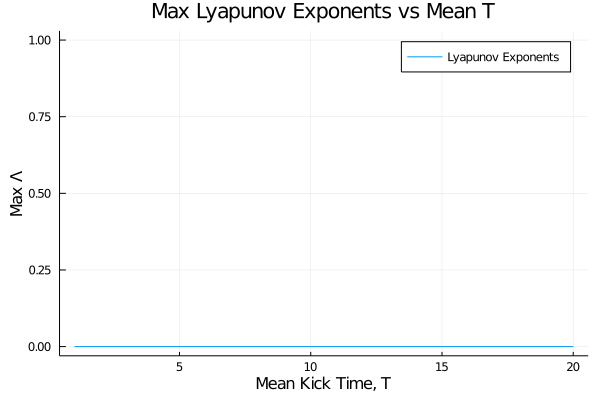

In [125]:
plot(Ts, λs, title = "Max Lyapunov Exponents vs Mean T", label="Lyapunov Exponents")
xlabel!("Mean Kick Time, T")
ylabel!("Max Λ")

# Yeast

In [18]:
@inline @inbounds function yeast_model(u, p, t)
    a = p[1]; b=p[2]; A=p[3];T=p[4]
    du1 = -u[1]+a*u[2]+u[1]^2*u[2]
    du2 = b - a*u[2]-u[1]^2*u[2]
    if t%T<0.001
        du2 = du2+A*sin(2*π*u[1])
    end
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function yeast_model_jac(u, p, t)
    a,b,A,T=p
    if t%T>0.001
        J = @SMatrix [-1+2*u[1]*u[2] a+u[1]^2;
        -2*u[1]*u[2] -a-u[1]^2]
    else
        J = @SMatrix [-1+2*u[1]*u[2] a+u[1]^2;
        -2*u[1]*u[2]+2*π*A*cos(2*π*u[1]) -a-u[1]^2]
    end

    return J
end

ds = ContinuousDynamicalSystem(yeast_model, [1.0, 1.0], [1,0.6,1.0,10], yeast_model_jac)

2-dimensional continuous dynamical system
 state:       [1.0, 1.0]
 e.o.m.:      yeast_model
 in-place?    false
 jacobian:    yeast_model_jac
 parameters:  [1.0, 0.6, 1.0, 10.0]

# Bogdanov-Takens system 

In [20]:
@inline @inbounds function BT_model(u, p, t)
    μ1 = p[1]; μ2=p[2]; A=p[3];T=p[4]
    du1 = u[2]
    du2 = u[1]*(u[1]-1)+μ1*u[2]+μ2*u[1]*u[2]
    if t%T<0.001
        du2 = du2+A*sin(2*π*u[1])
    end
    return SVector{2}(du1, du2)
end
# Jacobian:
@inline @inbounds function BT_model_jac(u, p, t)
    μ1,μ2,A,T=p
    if t%T<0.001
        J = @SMatrix [0 1;
        2*u[1]-1+μ2*u[2]+2*π*A*cos(2*π*u[1]) μ1+μ2*u[1]]
    else
        J = @SMatrix [0 1;
        2*u[1]-1+μ2*u[2] μ1+μ2*u[1]]
    end

    return J
end

ds = ContinuousDynamicalSystem(BT_model, [1.0, 1.0], [0.5,-0.5,1.0,10], BT_model_jac)

2-dimensional continuous dynamical system
 state:       [1.0, 1.0]
 e.o.m.:      BT_model
 in-place?    false
 jacobian:    BT_model_jac
 parameters:  [0.5, -0.5, 1.0, 10.0]